Модель LSTM может быть хорошим выбором для анализа временных последовательностей, таких как данные ЭЭГ, поскольку она способна улавливать временные зависимости между точками данных.

**Импорт Библиотек:** Импортируем не только стандартные библиотеки для работы с данными, но и библиотеки для работы с нейронными сетями, такие как Keras.

**Предобработка Данных:** Подготовим данные к обучению LSTM, что включает в себя нормализацию и изменение формы данных для временных последовательностей.

**Создание Модели LSTM:** Определим архитектуру LSTM с необходимым количеством слоёв и нейронов.

**Обучение Модели:** Обучим модель на тренировочных данных.

**Оценка Модели:** Оценим производительность модели на валидационных данных.

**Предсказания и Сохранение Результата:** Используем модель для предсказания тестовых данных и сохраним результаты.

In [ ]:
# Импорт библиотек
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Подключим google disk на который загружены данные эксперимента /Colab Notebooks/mat_data/Z_EEG_1/
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Загрузка данных
data_path = '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_data.csv'
events_path = '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/train/subj1_series1_events.csv'
test_data_path = '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/test/subj1_series9_data.csv'

# Чтение данных
data = pd.read_csv(data_path)
events = pd.read_csv(events_path)
test_data = pd.read_csv(test_data_path)


In [ ]:
# Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 1:])  # Исключаем столбец 'id'
test_data_scaled = scaler.transform(test_data.iloc[:, 1:])  # Исключаем столбец 'id'
print("data_scaled:", data_scaled)
print("test_data_scaled:", test_data_scaled)

data_scaled: [[-0.7941337  -0.13125651 -0.90300293 ...  0.76969814  0.20582429
   2.43303341]
 [-0.78878482 -0.19820266 -0.87892333 ...  0.59959036  0.06155059
   2.57944467]
 [-1.17122999 -0.40222902 -1.4134903  ...  0.59959036 -0.02033448
   2.31324239]
 ...
 [ 0.25959637 -0.10894113 -0.58033638 ... -0.67621794 -1.3109992
  -1.22724797]
 [ 0.04029214 -0.33847078 -0.38769963 ... -0.7984829  -1.39288427
  -1.03203296]
 [-0.06401109 -0.44048396 -0.7922368  ... -0.49547843 -1.15502763
  -1.36922252]]
test_data_scaled: [[-0.53471285 -0.60944329 -0.24803799 ...  0.31784936 -0.22309752
  -0.16243884]
 [-0.48389845 -0.7210202  -0.48883392 ...  0.37100804 -0.13341386
  -0.04708452]
 [-0.38494411 -0.62219494 -0.59478413 ...  0.493273   -0.06322666
  -0.15800214]
 ...
 [ 0.05901323 -0.80390591  0.22392204 ...  0.05737183 -0.63642217
  -0.39314748]
 [ 0.03494326 -0.7210202   0.29616082 ...  0.10521465 -0.53504065
  -0.41533101]
 [ 0.07238544 -0.60944329  0.32505633 ...  0.11053051 -0.65201932
  

Далее:  

**Создание Последовательностей:** Напишем функцию create_sequences, которая принимает нормализованные данные и метки событий и создает последовательности для LSTM.

**Разделение Данных:** Разделим данные на тренировочный и валидационный наборы.

**Создание Модели LSTM:** Определим архитектуру модели LSTM.

In [ ]:
# Определение функции для создания последовательностей
def create_sequences(data, labels, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        if labels is not None:
            y.append(labels[i + window_size])
    return np.array(X), (np.array(y) if labels is not None else None)

# Создание последовательностей для обучения
window_size = 10  # Определяем размер окна
X_train_seq, y_train_seq = create_sequences(data_scaled, events.iloc[:, 1:].values, window_size)
#X_test_seq = create_sequences(test_data_scaled, None, window_size)
X_test_seq, _ = create_sequences(test_data_scaled, None, window_size)

# Разделение на тренировочный и валидационный наборы
X_train_seq, X_val_seq, y_train_seq, y_val_seq = train_test_split(
    X_train_seq, y_train_seq, test_size=0.2, random_state=42
)

# Вывод размеров полученных наборов данных
print("Размеры тренировочного набора последовательностей:", X_train_seq.shape, y_train_seq.shape)
print("Размеры валидационного набора последовательностей:", X_val_seq.shape, y_val_seq.shape)
print("Размерность X_test_seq:", X_test_seq.shape)


Размеры тренировочного набора последовательностей: (95588, 10, 32) (95588, 6)
Размеры валидационного набора последовательностей: (23898, 10, 32) (23898, 6)
Размерность X_test_seq: (115943, 10, 32)


In [ ]:
# Определение архитектуры модели LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(window_size, X_train_seq.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train_seq.shape[1], activation='sigmoid'))

# Компиляция модели
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Вывод архитектуры модели для проверки
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 100)           53200     
                                                                 
 dropout (Dropout)           (None, 10, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 6)                 606       
                                                                 
Total params: 144306 (563.70 KB)
Trainable params: 14430

In [ ]:
# Задаем параметры обучения
epochs = 10  # Количество эпох
batch_size = 32  # Размер пакета

# Обучение модели
history = model.fit(
    X_train_seq, y_train_seq,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val_seq, y_val_seq)
)

Epoch 1/10
2988/2988 [==============================] - 86s 26ms/step - loss: 0.1213 - accuracy: 0.4080 - val_loss: 0.0786 - val_accuracy: 0.4369
Epoch 2/10
2988/2988 [==============================] - 82s 28ms/step - loss: 0.0670 - accuracy: 0.4353 - val_loss: 0.0530 - val_accuracy: 0.4092
Epoch 3/10
2988/2988 [==============================] - 81s 27ms/step - loss: 0.0499 - accuracy: 0.4287 - val_loss: 0.0389 - val_accuracy: 0.4282
Epoch 4/10
2988/2988 [==============================] - 74s 25ms/step - loss: 0.0412 - accuracy: 0.4296 - val_loss: 0.0361 - val_accuracy: 0.4618
Epoch 5/10
2988/2988 [==============================] - 80s 27ms/step - loss: 0.0352 - accuracy: 0.3958 - val_loss: 0.0299 - val_accuracy: 0.5083
Epoch 6/10
2988/2988 [==============================] - 75s 25ms/step - loss: 0.0307 - accuracy: 0.3823 - val_loss: 0.0295 - val_accuracy: 0.4499
Epoch 7/10
2988/2988 [==============================] - 78s 26ms/step - loss: 0.0270 - accuracy: 0.4108 - val_loss: 0.0258 -

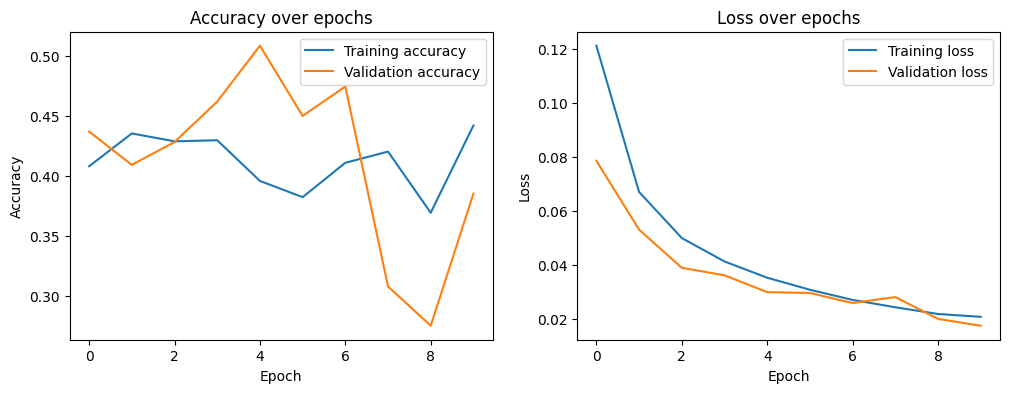

In [ ]:
# Визуализация процесса обучения
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation accuracy')
    plt.title('Accuracy over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.title('Loss over epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)

Похоже, что есть некоторая нестабильность в точности на валидационных данных, и точность на тренировочных данных относительно низкая. Возможно, это связано с несколькими факторами:  

**Переобучение:** Несмотря на то, что потери на тренировочных данных постоянно снижаются, точность не увеличивается соответственно, что может указывать на переобучение. Слои Dropout предназначены для борьбы с этим, но иногда может потребоваться более агрессивная регуляризация.  

**Сложность Модели:** Модель может быть слишком сложной или недостаточно сложной для представления данных. Возможно, потребуется настроить количество или размерность LSTM слоев.  

**Временное окно:** уменьшение окна позволяют модели фокусироваться на более коротких временных интервалах, что может быть полезным, если события в данных ЭЭГ происходят в короткие временные промежутки.  

**Размер Батча и Эпох:**  Уменьшение размера батча может помочь улучшить обобщающую способность модели за счет более частого обновления весов. Слишком большой размер батча может привести к нестабильному обучению, а количество эпох может быть недостаточным для сходимости модели.

**Оценка Модели:** Метрика точности может быть не лучшим выбором для оценки производительности модели в случае сильно несбалансированных классов, как это часто бывает с временными рядами ЭЭГ.

747/747 [==============================] - 8s 10ms/step


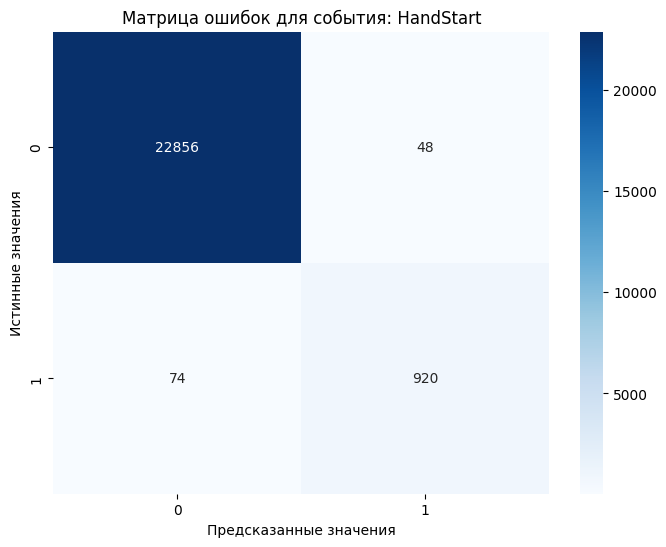

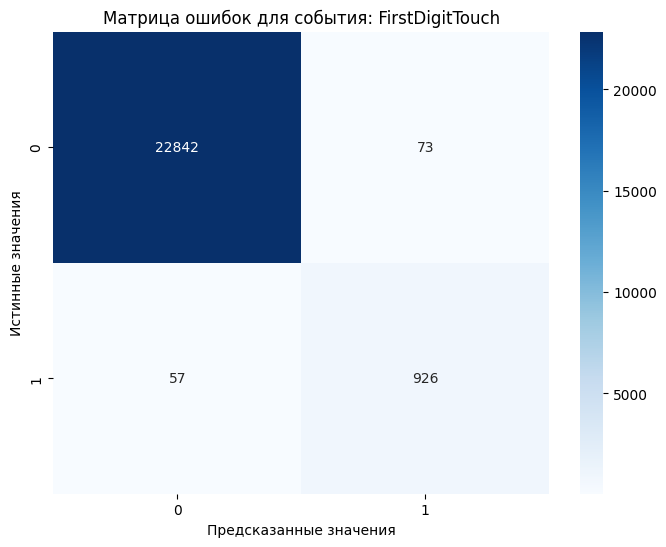

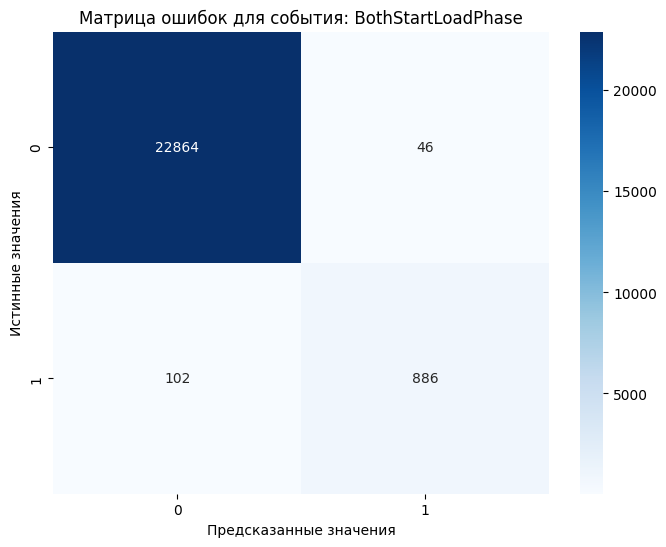

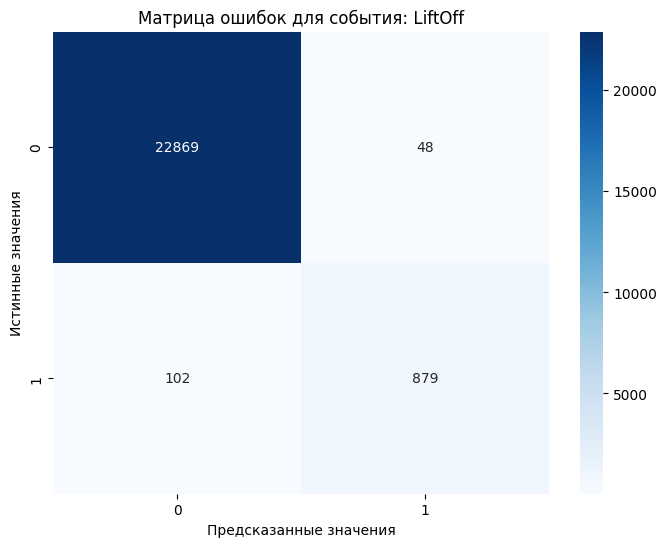

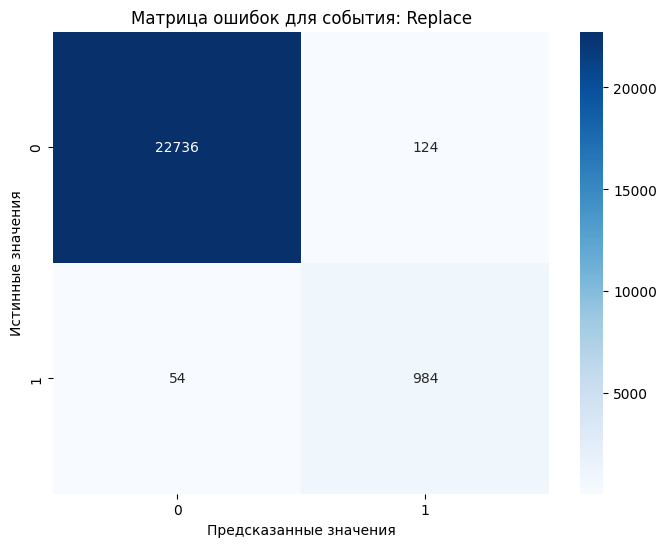

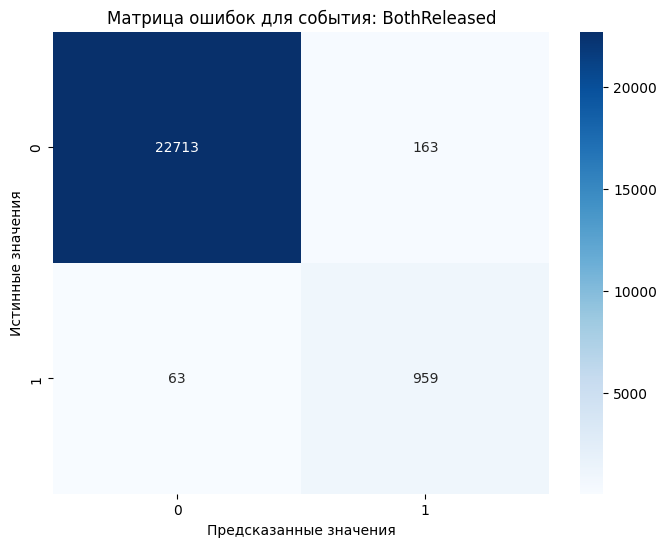

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns

# Предсказание на валидационном наборе
y_val_pred = model.predict(X_val_seq)

# Порог для классификации
threshold = 0.55
y_val_pred = (y_val_pred > threshold).astype(int)

# Вычисление матрицы ошибок для каждого события
mcm = multilabel_confusion_matrix(y_val_seq, y_val_pred)

# Визуализация матриц ошибок
for i, matrix in enumerate(mcm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues')
    plt.title(f'Матрица ошибок для события: {events.columns[i+1]}')  # Сдвигаем индекс на 1, так как первый столбец - это 'id'
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()


Из матриц ошибок видно, что модель обладает разной степенью точности для различных событий. Выводы, которые можно сделать из этих данных:  

**BothReleased:** Модель имеет относительно мало ложноположительных результатов (FP), но довольно много ложноотрицательных (FN), что указывает на то, что она может упускать моменты наступления события.  
**BothStartLoadPhase и FirstDigitTouch:** Здесь также присутствует большое количество FN, что опять же свидетельствует о том, что модель часто не улавливает моменты событий.  
**HandStart:** Для этого события количество FN существенно, а FP ниже по сравнению с другими событиями, что может указывать на более консервативное предсказание модели.  
**LiftOff и Replace:** Снова заметно высокое количество FN, указывающее на пропуск моделью наступления событий.  
Эти результаты могут указывать на необходимость улучшения чувствительности модели, чтобы уменьшить количество ложноотрицательных результатов. Возможно, потребуется подкорректировать порог классификации или изменить баланс классов в обучающем наборе данных.

Также, важно учитывать, что при работе с временными рядами и последовательностями, такими как ЭЭГ, модель LSTM может захватывать зависимости в данных, которые не обязательно связаны с конкретными событиями, которые мы пытаемся предсказать. Это может потребовать дополнительного анализа и возможно даже пересмотра того, какие данные подаются в модель для обучения.

Для улучшения производительности можно рассмотреть следующие шаги:

Провести дополнительный анализ важности признаков и исключить нерелевантные признаки.
Исследовать различные стратегии балансировки классов.
Применить техники усиления сигнала для событий, которые модель предсказывает хуже всего.
Попробовать другие архитектуры нейронных сетей, которые могут лучше улавливать сложные временные зависимости, такие как CNN или двунаправленные LSTM.
Рассмотреть возможность применения ансамблевых методов, где несколько моделей работают вместе для улучшения общей производительности.

 Приступим к завершающему шагу работы с получившейся моделью, а именно, сформируем файл событий основанный на результате работы модели на тестовом измерении в файле subj1_series9_data.csv.

In [ ]:
# Проверка размерности X_test_seq
print("Размерность X_test_seq:", X_test_seq.shape)

# Попробуйте вызвать predict на одном примере для проверки
single_test_example = np.expand_dims(X_test_seq[0], axis=0)
print("Размерность одного тестового примера:", single_test_example.shape)

# Предсказание для одного примера
single_test_pred = model.predict(single_test_example)
print("Предсказание для одного примера:", single_test_pred)


Размерность X_test_seq: (115943, 10, 32)
Размерность одного тестового примера: (1, 10, 32)
1/1 [==============================] - 0s 26ms/step
Предсказание для одного примера: [[9.7396169e-06 7.6954706e-08 1.3454928e-08 2.7118419e-06 1.8614097e-07
  5.1296324e-06]]


In [ ]:
# Предсказание на тестовом наборе данных
y_test_pred = model.predict(X_test_seq)

# Применяем порог для получения явных меток классов
threshold = 0.55  # Можно настроить порог на основе анализа матриц ошибок
y_test_pred = (y_test_pred > threshold).astype(int)

# Создание DataFrame для предсказаний
predicted_events_df = pd.DataFrame(y_test_pred, columns=events.columns[1:])

# Подготовка данных 'id' для тестового набора данных
test_ids = test_data['id'][window_size:].reset_index(drop=True)

# Добавление 'id' к предсказаниям
predicted_events_df.insert(0, 'id', test_ids)

# Сохранение предсказаний в CSV-файл
output_path = '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/LSTM/subj_series9_events.csv'
predicted_events_df.to_csv(output_path, index=False)

print(f"Файл событий сохранен как '{output_path}'.")


3624/3624 [==============================] - 29s 8ms/step
Файл событий сохранен как '/content/gdrive/MyDrive/Colab Notebooks/mat_data/Z_EEG_1/LSTM/subj_series9_events.csv'.
